In [208]:
import numpy as np
import scipy as sp
from scipy.optimize import bisect
import matplotlib.pyplot as plt
import sys
dir_string = 'C:/Users/rannu/OneDrive - NTNU/Desktop/VsPython/'+\
                'Spain/NMfDS/Assignments/'
sys.path.append(dir_string + 'Ass4')
sys.path.append(dir_string + 'Ass6')
sys.path.append(dir_string + 'Ass7')
sys.path.append(dir_string + 'Ass8')
sys.path.append(dir_string + 'Ass9')
from RTBP_definitions import r1, r2, OMEGA, ODE_R3BP, Jacobi_first_integral
from Lagrange_computations import compute_Lagrange_pt, compute_jacobi_const_Li
from custom_ODE_solver import ODE_solver
from PoincareR3BP import poincare_map_solve_ivp_R3BP
from variational_equation_RTBP import variational_eq
from crossings_RTBP import crossings_R3BP_by_mu

In [209]:
# Take a PO around L3, for example
mu = 0.01
x = 1.033366313746765
y = 0
vx = 0
vy = -0.05849376854515592
T = 2 * 3.114802556760205

L3 = [x, y, vx, vy]

### From Assignment 11

In [210]:
C = Jacobi_first_integral(mu, L3[0], L3[1], L3[2], L3[3])
print('\nC = ', C)


C =  3.019


In [211]:
def u_manif(x, vy, compute_crossing = True, time = 0):
    init_cond = [x, 0, 0, vy]
    # Find the crossing time of the unstable manifold with the Poincare section
    iregion = 1
    t0 = 0
    tmax = 0.15
    dt = 0.1
    t_span = np.arange(t0, tmax, dt)

    # Variables for tweaking the accuracy of the crossing time
    refinement = 20000
    refinement_fine = 300
    tol = 1e-14
    tmax_plot = time
    newInitial = init_cond
    TimeDuration = time
    if compute_crossing: # do this two times for two crossings
        newInitial, TimeDuration1,_ = \
            poincare_map_solve_ivp_R3BP(lambda t, X: ODE_R3BP(t, mu, X), 
                                        init_cond, 
                                        iregion, dt, t_span, mu, 
                                        init_search = refinement, 
                                        refinement = refinement_fine, 
                                        newton_tol = tol)
        newInitial, TimeDuration2,_ = \
            poincare_map_solve_ivp_R3BP(lambda t, X: ODE_R3BP(t, mu, X), 
                                        newInitial, 
                                        iregion, dt, t_span, mu, 
                                        init_search = refinement, 
                                        refinement = refinement_fine, 
                                        newton_tol = tol)
        tmax_plot = TimeDuration1 + TimeDuration2
        TimeDuration = tmax_plot
    t_span_plot = np.arange(t0, tmax_plot, 0.01)

    # Solve ode_r3bp using the custom ODE solver,  RETURNS: the solution of the 
    # system of ODEs as a scipy.integrate.solve_ivp object
    sol = ODE_solver(lambda t, X: ODE_R3BP(t, mu, X), init_cond, tmax_plot, 
                    len(t_span_plot), tol=1e-12, method='DOP853', hamiltonian=0)

    # Extract the solution
    x = sol.y[0]
    y = sol.y[1]
    vx = sol.y[2]
    vy = sol.y[3]
    # print dimentions of every thing that is returned
    # print('x.shape = ', x.shape)
    # print('y.shape = ', y.shape)
    # print('vx.shape = ', vx.shape)
    # print('vy.shape = ', vy.shape)
    # print('t_span_plot.shape = ', t_span_plot.shape)
    return x, y, vx, vy, t_span_plot, newInitial, TimeDuration

1.033366313746765


TimeDuration =  6.229605113643316


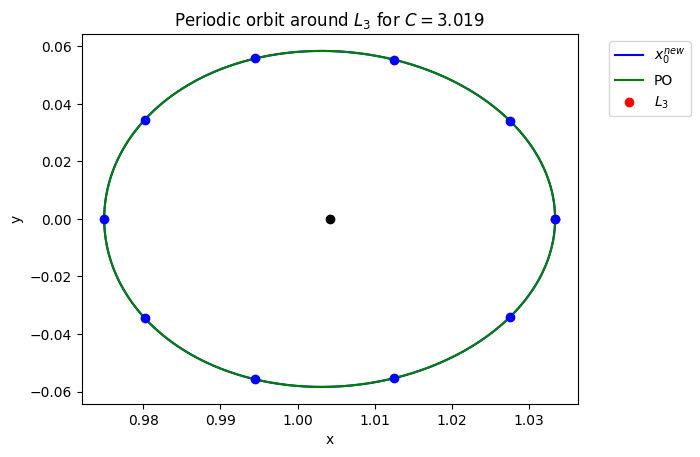

In [212]:
print(x)
x_lst, y_lst, vx_lst, vy_lst, t_span_plot, newInitial, TimeDuration = \
    u_manif(x, vy)
print("TimeDuration = ", TimeDuration)
x_L3 = compute_Lagrange_pt(mu, 3)
# Plot the orbit
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_lst, y_lst, 'b')
ax.plot(x_lst, -y_lst, 'g')
ax.plot(newInitial[0], newInitial[1], 'ro')
ax.plot(x_L3, 0, color = 'black', marker = 'o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(f'Periodic orbit around $L_3$ for $C = {C}$')
# plot some equidistant points on the orbit
n = 10
for i in range(n):
    ax.plot(x_lst[i*len(x_lst)//n], y_lst[i*len(y_lst)//n], 'bo')
    #ax.plot(x_lst[i*len(x_lst)//n], -y_lst[i*len(y_lst)//n], 'go')
# make a legend
legend = [r'PO', r'PO mirror', r'$x_0^{new}$', r'$L_3$']
legend = [r'$x_0^{new}$', r'PO', r'$L_3$']
#plot the legend outside of the plot
ax.legend(legend, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Text(0.5, 1.0, 'Initial conditions for $C = 3.019$')

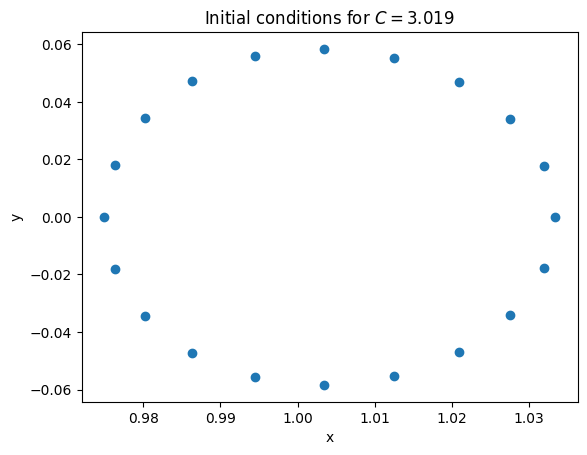

In [213]:
# plot some equidistant points on the orbit
n = 20
init_conds = np.zeros((n, 4))

for i in range(n):
    init_conds[i] = [x_lst[i*len(x_lst)//len(init_conds)], 
                    y_lst[i*len(y_lst)//len(init_conds)], 
                    vx_lst[i*len(vx_lst)//len(init_conds)], 
                    vy_lst[i*len(vy_lst)//len(init_conds)]]
    

# Plot the initial conditions as scatter plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(init_conds[:, 0], init_conds[:, 1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title(f'Initial conditions for $C = {C}$')


In [214]:
# # Take a PO around L3, for example
# mu = 0.01
# x = 1.033366313746765
# y = 0
# vx = 0
# vy = -0.05849376854515592
# T = 2 * 3.114802556760205

# # initial conditions and identity matrix
# x0 = [x, y, vx, vy]
# x0.extend([1, 0, 0, 0, 
#            0, 1, 0, 0, 
#            0, 0, 1, 0, 
#            0, 0, 0, 1]) 

# t_span = np.arange(0, T, 0.01)

# # Integrate the variational equations for one period to acquire the monodromy 
# # matrix
# # Solve ode_r3bp using the custom ODE solver,  RETURNS: the solution of the 
# # system of ODEs as a scipy.integrate.solve_ivp object
# sol = ODE_solver(lambda t, X: variational_eq(t, X, mu, dir), x0, T, 
#                 len(t_span), tol=1e-12, method='DOP853', hamiltonian=0)

# # Extract the solution at the end of the interval
# ve_end = sol.y[:, -1]
# # Extract the monodromy matrix
# M = ve_end[4:].reshape((4, 4))

# np.set_printoptions(precision=2, suppress=False)
# print('M = \n', M)

# # Compute the eigenvalues of the monodromy matrix
# eigvals, eigvecs = np.linalg.eig(M)
# # only the real part of the eigenvalues are of interest
# eigvals = eigvals.real
# print('eigenvalues = ', eigvals)
# # multiply all the eigenvalues together to get the Floquet multiplier
# floquet_multiplier = np.prod(eigvals)
# print('floquet_multiplier = ', floquet_multiplier)
# eigvec_big = eigvecs.real[:,0]
# eigvec_small = eigvecs.real[:,1]
# print('eigvec_big = ', eigvec_big)
# print('eigvec_small = ', eigvec_small)

In [215]:
def compute_monodromy_mx(x, y, vx, vy, mu, T):
    # initial conditions and identity matrix
    x0 = [x, y, vx, vy]
    x0.extend([1, 0, 0, 0, 
            0, 1, 0, 0, 
            0, 0, 1, 0, 
            0, 0, 0, 1]) 

    t_span = np.arange(0, T, 0.01)

    # Integrate the variational equations for one period to acquire the monodromy 
    # matrix
    # Solve ode_r3bp using the custom ODE solver,  RETURNS: the solution of the 
    # system of ODEs as a scipy.integrate.solve_ivp object
    sol = ODE_solver(lambda t, X: variational_eq(t, X, mu, 1), x0, T, 
                    len(t_span), tol=1e-12, method='DOP853', hamiltonian=0)

    # Extract the solution at the end of the interval
    ve_end = sol.y[:, -1]
    # Extract the monodromy matrix
    M = ve_end[4:].reshape((4, 4))
    return M

In [216]:
def poincare_map_solve_ivp_R3BP_mod(ODE_R3BP, initial_conditions, dir,
                                step, t_span, mu, init_search=100, 
                                init_tol=1e-12, refinement=100, 
                                newton_tol = 1e-15):
    ### Modified function from assignment 7
    """
    Solve the Poincare map for the Restricted Three-Body Problem (R3BP).

    Args:
        ODE_R3BP (function): The Ordinary Differential Equation (ODE) for the R3BP.
        initial_conditions (list): The initial conditions for the ODE.
        dir (int): The direction of integration (+1 for forward, -1 for backward).
        step (float): The step size for integration.
        t_span (list): The time span for integration.
        mu (float): The mass ratio parameter for the R3BP.
        init_search (int, optional): The number of steps to search for the first crossing. Defaults to 100.
        refinement (int, optional): The number of iterations for Newton's method refinement. Defaults to 100.
        newton_tol (float, optional): The tolerance for Newton's method convergence. Defaults to 1e-15.

    Raises:
        ValueError: Raised when no crossing is found within the specified search range.
        ValueError: Raised when Newton's method does not converge within the specified number of iterations.

    Returns:
        tuple: A tuple containing the new initial conditions and the time duration of the crossing.
    """
    # Procedure to compute when the x-axis is crossed
    # for the first time
    x_cross = 0.2
    crossing_check = x_cross + 1
    time = 0
    startPoint = np.array(initial_conditions)
    initial_conditions = initial_conditions
    failed_mu = -1



    while crossing_check-.01 > x_cross and abs(time) < abs(step*init_search):
        if dir == 1:
            solution = ODE_solver(ODE_R3BP, startPoint, t_span[1], 1000,
                                t_min=t_span[0], tol = init_tol,
                hamiltonian=lambda X: Jacobi_first_integral(mu, X[0], X[1],
                                                            X[2], X[3]))
            Y = solution.y.T  # Transposing to match previous structure
            crossing_check = Y[-1, 0]  # Check if x = x_cross is crossed
        else: # Going backwards in time
            solution = ODE_solver(ODE_R3BP, startPoint, t_span[0], 1000,
                                t_min=t_span[1], tol = init_tol,
                hamiltonian=lambda X: Jacobi_first_integral(mu, X[0], X[1],
                                                            X[2], X[3]))
            Y = solution.y.T  # Transposing to match previous structure
            crossing_check = Y[0, 0]
        startPoint = Y[-1, :]
        t_span = [t_span[0] + dir * step, t_span[1] + dir * step]
        time += step*dir

    # make an error if the x-axis is never crossed
    if abs(time) >= abs(step*init_search):
        raise ValueError("No crossing found, initial search failed" +
                          "\ntime:  " + str(time) +
                         "\ncrossing_check  " + str(crossing_check) + "\nstep " 
                         + str(step) +
                            "\ninit_search  " + str(init_search))

    def poincare_section(X):
        return X[0] - x_cross

    # Procedure to compute the exact time of the crossing
    # Using Newton - Raphson method
    for i in range(refinement):
        solution = ODE_solver(ODE_R3BP, initial_conditions, time, 1000,
                              tol = init_tol,
                              hamiltonian=lambda X: \
                                Jacobi_first_integral(mu, X[0], X[1],
                                                        X[2], X[3]))
        Y = solution.y.T
        difference = poincare_section(Y[-1, :]) / ODE_R3BP(0, Y[-1, :])[0]
        time -= difference
        if i == refinement - 1:
            failed_mu = mu
        if abs(poincare_section(Y[-1, :])) < newton_tol :#or \
            break

    TimeDuration = time
    newInitial = Y[-1, :]
    return newInitial, TimeDuration, failed_mu

In [217]:
def inv_manif_single(x, y, vx, vy, compute_crossing = True, time = 0):
    init_cond = np.array([x, y, vx, vy])
    # Find the crossing time of the unstable manifold with the Poincare section
    iregion = 1
    t0 = 0
    tmax = 0.15#*iregion
    dt = 0.05
    t_span = np.arange(t0, tmax, dt)

    # Variables for tweaking the accuracy of the crossing time
    refinement = 20000
    refinement_fine = 300
    tol = 1e-14
    tmax_plot = time
    newInitial = init_cond
    TimeDuration = time
    # Later, modify crossing to the Poincare sec. x = 0.1
    if compute_crossing:
        newInitial, TimeDuration,_ = \
            poincare_map_solve_ivp_R3BP_mod(lambda t, X: ODE_R3BP(t, mu, X), 
                                        init_cond, 
                                        iregion, dt, t_span, mu, 
                                        init_search = refinement, 
                                        refinement = refinement_fine, 
                                        newton_tol = tol)

        tmax_plot = TimeDuration
    t_span_plot = np.arange(t0, tmax_plot, 0.01)

    # Solve ode_r3bp using the custom ODE solver,  RETURNS: the solution of the 
    # system of ODEs as a scipy.integrate.solve_ivp object
    sol = ODE_solver(lambda t, X: ODE_R3BP(t, mu, X), init_cond, tmax_plot, 
                    len(t_span_plot), tol=1e-12, method='DOP853', hamiltonian=0)

    # Extract the solution
    x = sol.y[0]
    y = sol.y[1]
    vx = sol.y[2]
    vy = sol.y[3]
    # print dimentions of every thing that is returned
    # print('x.shape = ', x.shape)
    # print('y.shape = ', y.shape)
    # print('vx.shape = ', vx.shape)
    # print('vy.shape = ', vy.shape)
    # print('t_span_plot.shape = ', t_span_plot.shape)
    return x, y, vx, vy, t_span_plot, newInitial, TimeDuration

Jacobi_first_integral = 
 [7.97874211e-10 7.97866218e-10 7.97840460e-10 7.97800936e-10
 7.97810262e-10 7.97755639e-10 7.97746313e-10 7.97776956e-10
 7.97705013e-10 7.97707678e-10]


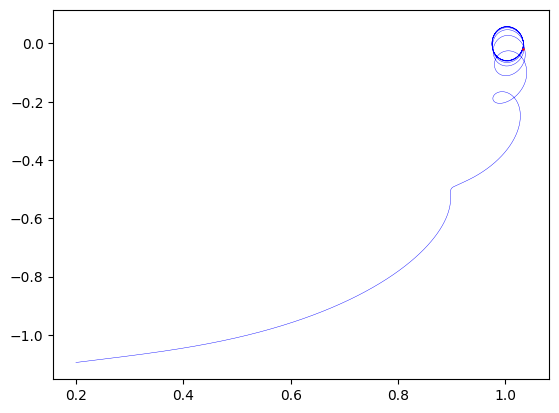

In [218]:
# test init cond
init_cond_test = init_conds[1, :]
# print('init_cond = ', init_cond_test)
T = 2 * 3.114802556760205
# Compute the monodromy matrix
M = compute_monodromy_mx(init_cond_test[0], init_cond_test[1],
                          init_cond_test[2], init_cond_test[3], mu, T)
eigvals, eigvecs = np.linalg.eig(M)

idx = np.argmax(eigvals)
eigval_big = eigvals[idx].real
eigvec_big = eigvecs.real[:,idx]
eigvec_u = eigvec_big / np.linalg.norm(eigvec_big) # Normalize

# idx = np.argmin(eigvals)
# eigval_small = eigvals[idx].real
# eigvec_small = eigvecs.real[:,idx]
# eigvec_u = eigvec_small / np.linalg.norm(eigvec_small) # Normalize

if eigvec_u[1] < 0:
    eigvec_u = -eigvec_u
init_conds_u_pos = init_cond_test - eigvec_u * 10**(-4)
# print('init_conds_u_pos = ', init_conds_u_pos)

compute_crossing = True
time = 1

# Compute the unstable manifold
x_lst, y_lst, vx_lst, vy_lst, t_span_plot, newInitial, TimeDuration = \
    inv_manif_single(init_conds_u_pos[0], init_conds_u_pos[1], init_conds_u_pos[2], 
                init_conds_u_pos[3], compute_crossing, time)

# Compute the Jacobi_first_integral of 10 random points along the orbit
C = Jacobi_first_integral(mu, L3[0], L3[1], L3[2], L3[3])
n_C = 10   
C_lst = np.zeros(n_C)
for i in range(n_C):
    C_lst[i] = Jacobi_first_integral(mu, x_lst[i*len(x_lst)//n_C], 
                                    y_lst[i*len(y_lst)//n_C], 
                                    vx_lst[i*len(vx_lst)//n_C], 
                                    vy_lst[i*len(vy_lst)//n_C])
# Turn on scientific notation
np.set_printoptions(suppress=False)
print("Jacobi_first_integral = \n", C_lst-C)

# Plot the orbit
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x_lst, y_lst, 'b', linewidth=0.3)
# plot starting point, as a tiny red dot
ax.plot(x_lst[0], y_lst[0], 'ro', markersize=0.8)

In [219]:
def inv_manif(x, y, vx, vy, compute_crossing = True, time = 0, positive = True, 
              stable = False):
    init_cond = np.array([x, y, vx, vy])
    # init_cond = [x, y, vx, vy]
    # Find the crossing time of the unstable manifold with the Poincare section
    iregion = 1
    if stable:
        iregion = -1
    t0 = 0
    tmax = 0.15#*iregion
    dt = 0.05
    t_span = np.arange(t0, tmax, dt)

    # Variables for tweaking the accuracy of the crossing time
    refinement = 20000
    refinement_fine = 300
    tol = 1e-14
    tmax_plot = time
    newInitial = init_cond
    TimeDuration = time
    
    # Compute the monodromy matrix
    T = 2 * 3.114802556760205
    M = compute_monodromy_mx(init_cond[0], init_cond[1], 
                             init_cond[2], init_cond[3], mu, T)
    eigvals, eigvecs = np.linalg.eig(M)

    # if, else statement to choose the stable or unstable manifold
    if stable:
        idx = np.argmin(eigvals)
        eigvec = eigvecs.real[:,idx]
    else:
        idx = np.argmax(eigvals)
        eigvec = eigvecs.real[:,idx]
    eigvec_u = eigvec / np.linalg.norm(eigvec) # Normalize
    internal_tol = 10**(-4)
    # if, else statement to choose the direction of the manifold
    if eigvec_u[1] < 0:
        eigvec_u = -eigvec_u
    if positive:
        init_conds_u_pos = init_cond + eigvec_u * internal_tol
    else:
        init_conds_u_pos = init_cond - eigvec_u * internal_tol
    
    # np.set_printoptions(precision=2, suppress=True)
    # print(f'init_conds_u_pos[{j}] = ', init_conds_u_pos)
    # print(f'eigvec_u[{j}] = ', eigvec_u)
    # Later, modify crossing to the Poincare sec. x = 0.1
    if compute_crossing:
        newInitial, TimeDuration,_ = \
            poincare_map_solve_ivp_R3BP_mod(lambda t, X: ODE_R3BP(t, mu, X), 
                                        init_conds_u_pos, 
                                        iregion, dt, t_span, mu, 
                                        init_search = refinement, 
                                        refinement = refinement_fine, 
                                        newton_tol = tol)

        tmax_plot = TimeDuration
    t_span_plot = np.linspace(t0, tmax_plot, num = len(t_span_plot_u_pos))

    # Solve ode_r3bp using the custom ODE solver,  RETURNS: the solution of the 
    # system of ODEs as a scipy.integrate.solve_ivp object
    sol = ODE_solver(lambda t, X: ODE_R3BP(t, mu, X), init_conds_u_pos, 
                     tmax_plot, len(t_span_plot), tol=1e-12, 
                     method='DOP853', hamiltonian=0)

    return sol.y[0], sol.y[1], sol.y[2], sol.y[3], t_span_plot, \
        newInitial, TimeDuration

In [220]:
NO_init_conds = n

# use u_manif to compute the unstable manifold up to a time, do not
# compute the crossing time
compute_crossing = True
time = 61
t_span_plot_u_pos = np.arange(0, time, 0.01)
x_lst_u_pos = np.zeros((NO_init_conds, len(t_span_plot_u_pos)))
y_lst_u_pos = np.zeros((NO_init_conds, len(t_span_plot_u_pos)))
vx_lst_u_pos = np.zeros((NO_init_conds, len(t_span_plot_u_pos)))
vy_lst_u_pos = np.zeros((NO_init_conds, len(t_span_plot_u_pos)))
TimeDuration_u_pos = np.zeros((NO_init_conds, len(t_span_plot_u_pos)))
newInitial_u_pos = np.zeros((NO_init_conds, 4))
for j in range(NO_init_conds):
    x_lst_u_pos[j], y_lst_u_pos[j], vx_lst_u_pos[j], vy_lst_u_pos[j], \
        TimeDuration_u_pos[j], \
        newInitial_u_pos[j], TimeDuration_u_pos[j] = \
            inv_manif(init_conds[j, 0], init_conds[j, 1], init_conds[j, 2],
                        init_conds[j, 3], compute_crossing, time, stable=False, positive=False)
    

In [221]:
def plot_darkmode():
    # make background black, and text and axes white
    # Set the face color of the figure (outside the axes)
    plt.gcf().set_facecolor('black')
    ax.set_facecolor('black')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    plt.gca().spines['bottom'].set_color('white')
    plt.gca().spines['top'].set_color('white')
    plt.gca().spines['right'].set_color('white')
    plt.gca().spines['left'].set_color('white')
    return 0

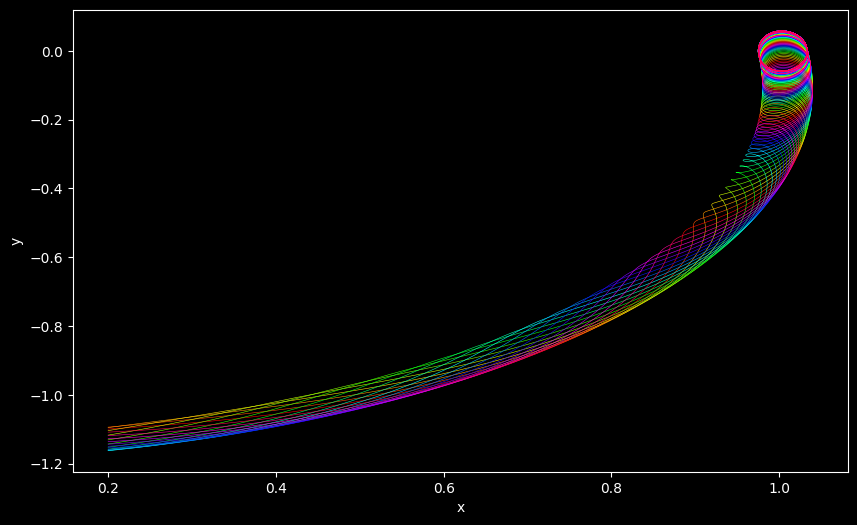

In [222]:
import matplotlib.colors as mcolors

# Plot the orbits
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('x')
ax.set_ylabel('y')

# Calculate the number of lines to draw
num_lines = len(init_conds)
# Generate a list of RGB colors
colors = [mcolors.rgb2hex(mcolors.hsv_to_rgb((i / num_lines, 1, 1))) \
          for i in range(num_lines)]

# Plot the lines with the rainbow colors
for i in range(num_lines):
    ax.plot(x_lst_u_pos[i], y_lst_u_pos[i], colors[i], linewidth=0.4)

plot_darkmode()
# increase dpi to 300 for better resolution
#plt.savefig('stable=False, positive=False.png', dpi=600, facecolor='black')

#plt.savefig('high_res_image.png', dpi=600, facecolor='black')
plt.show()

In [223]:
# use inv_manif() to store all four cases of stable = True/False and   
# positive = True/False. store all ov them in arrays for plotting, dependent on
# the number of initial conditions like before
NO_init_conds = n
time = 61
t_span_plot_u_pos = np.arange(0, time, 0.01)

x_lst_u_pos = np.zeros((NO_init_conds*4, len(t_span_plot_u_pos)))
y_lst_u_pos = np.zeros((NO_init_conds*4, len(t_span_plot_u_pos)))
vx_lst_u_pos = np.zeros((NO_init_conds*4, len(t_span_plot_u_pos)))
vy_lst_u_pos = np.zeros((NO_init_conds*4, len(t_span_plot_u_pos)))
TimeDuration_u_pos = np.zeros((NO_init_conds*4, len(t_span_plot_u_pos)))
newInitial_u_pos = np.zeros((NO_init_conds*4, 4))

for j in range(4):
    for k in range(NO_init_conds):
        x_lst_u_pos[j*NO_init_conds+k], y_lst_u_pos[j*NO_init_conds+k], \
            vx_lst_u_pos[j*NO_init_conds+k], vy_lst_u_pos[j*NO_init_conds+k], \
            TimeDuration_u_pos[j*NO_init_conds+k], \
            newInitial_u_pos[j*NO_init_conds+k], TimeDuration_u_pos[j*NO_init_conds+k] = \
                inv_manif(init_conds[k, 0], init_conds[k, 1], init_conds[k, 2],
                            init_conds[k, 3], compute_crossing, time, 
                            stable=j%2==0, positive=j<2)

Text(0.5, 1.0, 'Invariant manifolds of PO around $L_3$')

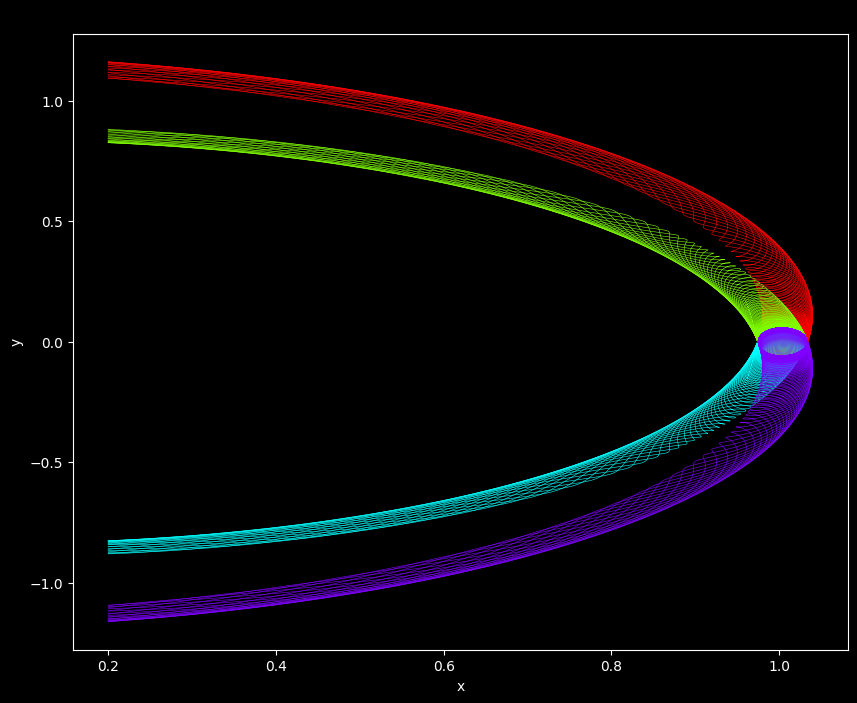

In [226]:
# Plot the orbits
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('x')
ax.set_ylabel('y')

# Calculate the number of lines to draw
num_lines = NO_init_conds*4
# Generate a list of RGB colors

colors = [mcolors.rgb2hex(mcolors.hsv_to_rgb((i / 4, 1, 1))) \
          for i in range(4)]

# Plot the 4 manifolds in different colors
for j in range(4):
    for i in range(NO_init_conds):
        ax.plot(x_lst_u_pos[j*NO_init_conds+i], y_lst_u_pos[j*NO_init_conds+i], 
                colors[j], linewidth=0.4)
        #ax.plot(x_lst_u_pos[i][0], y_lst_u_pos[i][0], 'ro', markersize=0.8)

plot_darkmode()


plt.savefig('All 4 full orbit black.png', dpi=600, facecolor='black')
        
# plot title
ax.set_title('Invariant manifolds of PO around $L_3$')

Text(0.5, 1.0, 'Speeds of the invariant manifolds at the Poincare section')

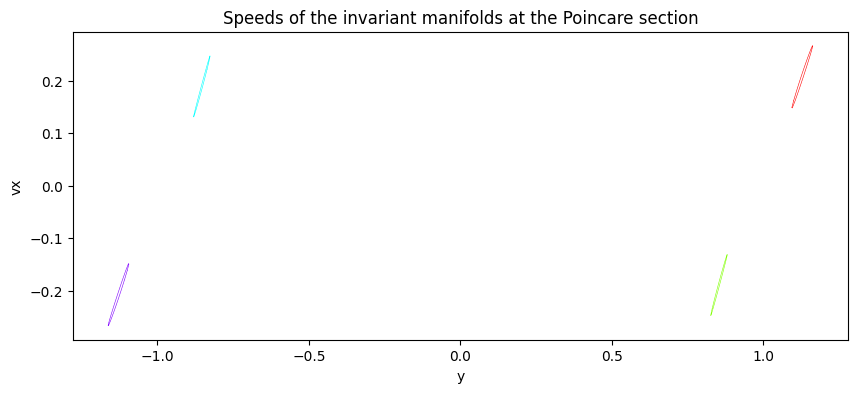

In [236]:
# Make a plot of (y_lst_u_pos, vx_lst_u_pos) for all four cases at the last 
# point of the orbit

# Plot the orbits
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(111)
ax.set_xlabel('y')
ax.set_ylabel('vx')

# Calculate the number of lines to draw
num_lines = NO_init_conds*4
# Generate a list of RGB colors

colors = [mcolors.rgb2hex(mcolors.hsv_to_rgb((i / 4, 1, 1))) \
            for i in range(4)]

# Plot the 4 manifolds in different colors
for j in range(4):
    orbit = np.zeros((NO_init_conds, 2))
    for i in range(NO_init_conds):
        orbit[i] = [y_lst_u_pos[j*NO_init_conds+i][-1], 
                    vx_lst_u_pos[j*NO_init_conds+i][-1]]
    ax.plot(orbit[:, 0], orbit[:, 1], colors[j], linewidth=0.4)
    # make a line between first and last point of the orbit
    ax.plot([orbit[0, 0], orbit[-1, 0]], [orbit[0, 1], orbit[-1, 1]], 
            colors[j], linewidth=0.4)

#plot_darkmode()

# plot title
ax.set_title('Speeds of the invariant manifolds at the Poincare section')

#plt.savefig('All 4 speeds black.png', dpi=600, facecolor='black')


In [243]:
# Compute the Jacobi_first_integral of 10 random points along the orbit
C = Jacobi_first_integral(mu, L3[0], L3[1], L3[2], L3[3])
n_C = 20 
C_lst = np.zeros(n_C)
for i in range(n_C):
    C_temps = Jacobi_first_integral(mu, x_lst_u_pos[i*len(x_lst_u_pos)//n_C], 
                                    y_lst_u_pos[i*len(y_lst_u_pos)//n_C], 
                                    vx_lst_u_pos[i*len(vx_lst_u_pos)//n_C], 
                                    vy_lst_u_pos[i*len(vy_lst_u_pos)//n_C])
    # take one random index of c_temps
    C_lst[i] = C_temps[-1]
print("Jacobi constant difference = \n", C_lst-C)

Jacobi_first_integral difference = 
 [ 8.07878653e-10  2.17677876e-10 -7.89150967e-10 -6.62109922e-10
  3.81339404e-10  8.07305334e-10  3.80529386e-10 -6.62967903e-10
 -7.89589283e-10  2.17306173e-10  8.07305778e-10  2.17241780e-10
 -7.89685206e-10 -6.62871535e-10  3.80598664e-10  8.07879541e-10
  3.81275012e-10 -6.62204513e-10 -7.89056820e-10  2.17742269e-10]
